In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [39]:
users = pd.read_csv('users.csv')
users['Users'] = pd.to_numeric(users['Users'].str.replace(',', ''))
users['Day Index'] = pd.to_datetime(users['Day Index'], format='%m/%d/%y')
users.head()

,Day Index,Users
0,2023-01-01,1082
1,2023-01-02,1303
2,2023-01-03,1568
3,2023-01-04,2251
4,2023-01-05,2312


In [40]:
sessions = pd.read_csv('sessions.csv')
sessions['Sessions'] = pd.to_numeric(sessions['Sessions'].str.replace(',', ''))
sessions['Day Index'] = pd.to_datetime(sessions['Day Index'], format='%m/%d/%y')
sessions.head()

,Day Index,Sessions
0,2023-01-01,1176
1,2023-01-02,1408
2,2023-01-03,1711
3,2023-01-04,2470
4,2023-01-05,2554


In [41]:
bounce_rate = pd.read_csv('bounce_rate.csv')
bounce_rate['Bounce Rate'] = pd.to_numeric(bounce_rate['Bounce Rate'].str.rstrip('%')) / 100
bounce_rate['Day Index'] = pd.to_datetime(bounce_rate['Day Index'], format='%m/%d/%y')
bounce_rate.head()

,Day Index,Bounce Rate
0,2023-01-01,0.5349
1,2023-01-02,0.5277
2,2023-01-03,0.5038
3,2023-01-04,0.4538
4,2023-01-05,0.4742


In [42]:
users = users['Users']
sessions = sessions['Sessions']
bounce_rate = bounce_rate['Bounce Rate']

In [43]:
def plot(data, anomalies, title):
  plt.figure(figsize=(12, 6))
  plt.plot(data.index, data, label='Normal Data')
  plt.scatter(anomalies.index, anomalies, label='Anomalies', color='red')
  plt.title(title)
  plt.legend()
  plt.show()

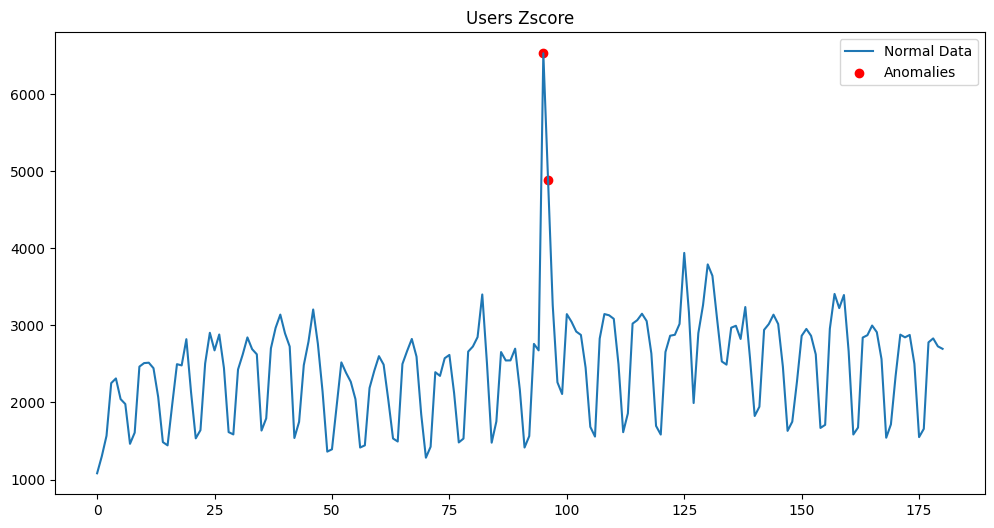

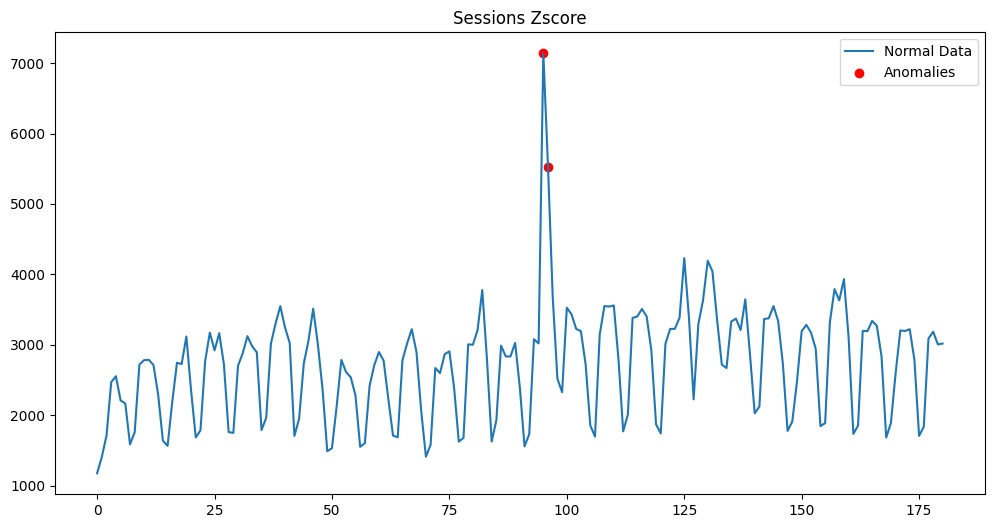

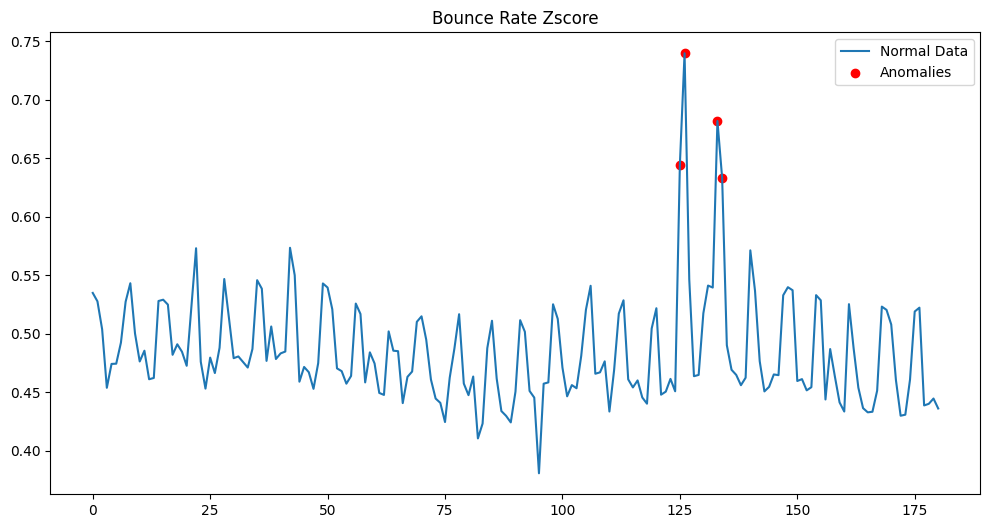

In [44]:
def zscore(data):
  mean = data.mean()
  std = data.std()
  return data[(data - mean).abs() > 3 * std]

plot(users, zscore(users), 'Users Zscore')
plot(sessions, zscore(sessions), 'Sessions Zscore')
plot(bounce_rate, zscore(bounce_rate), 'Bounce Rate Zscore')

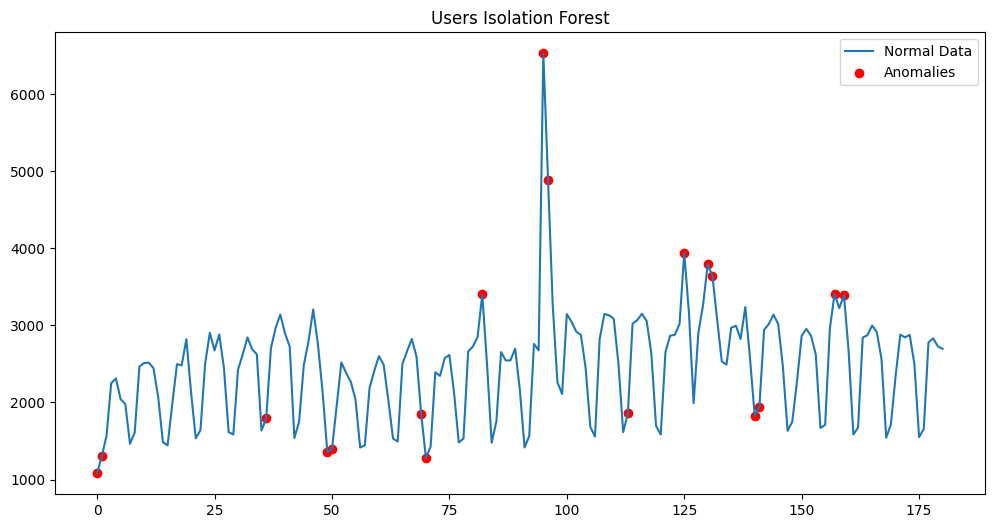

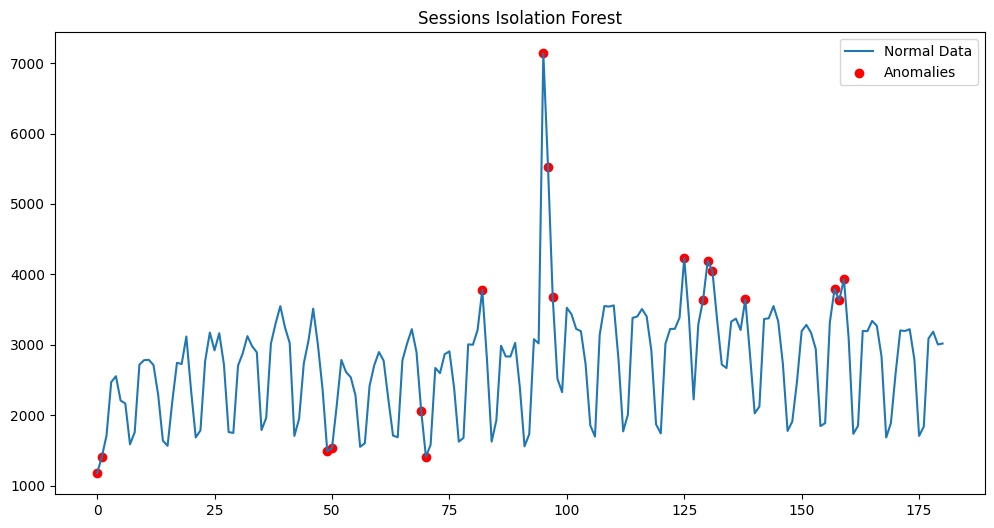

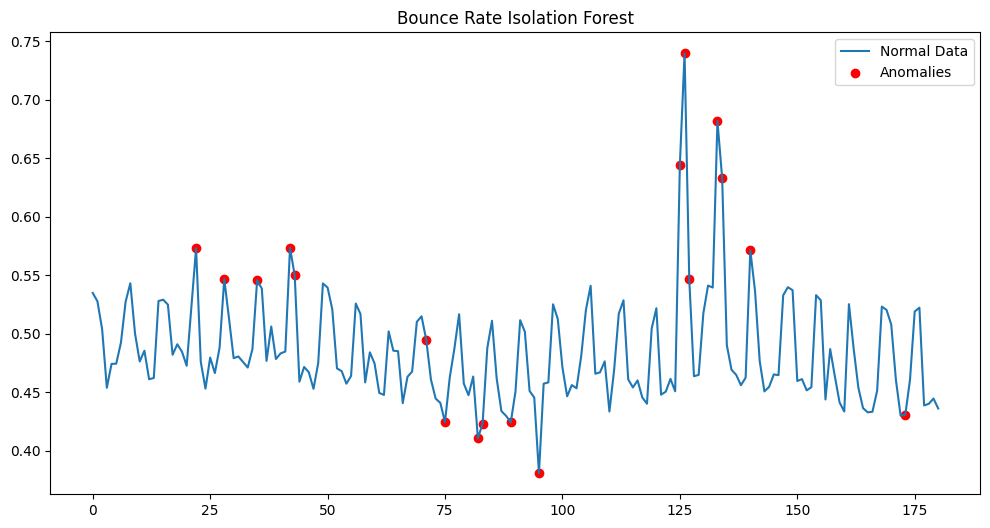

In [45]:
def isolation_forest(data):
  iso_for = IsolationForest(random_state=0, n_estimators=100, contamination='auto')
  pred = iso_for.fit_predict(data.values.reshape(-1, 1))
  return data[pred == -1]

plot(users, isolation_forest(users), 'Users Isolation Forest')
plot(sessions, isolation_forest(sessions), 'Sessions Isolation Forest')
plot(bounce_rate, isolation_forest(bounce_rate), 'Bounce Rate Isolation Forest')

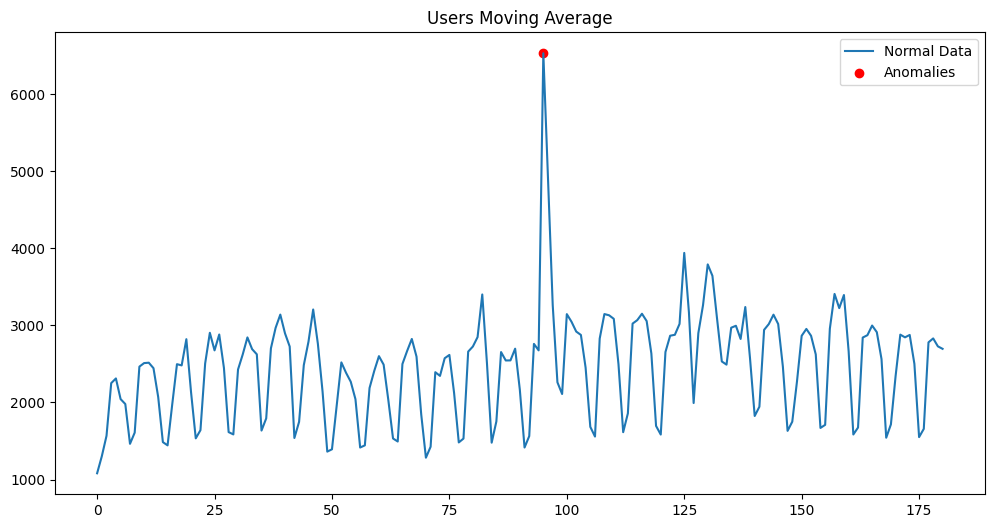

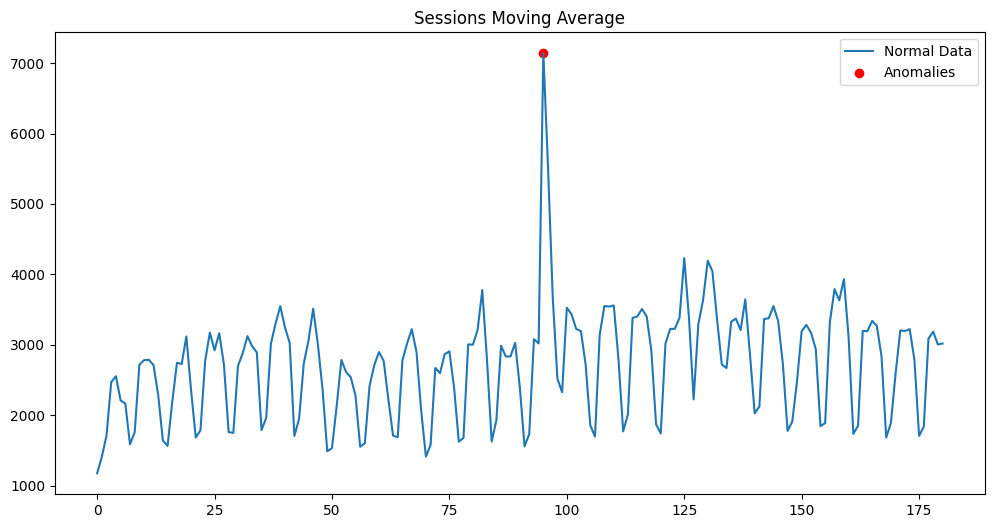

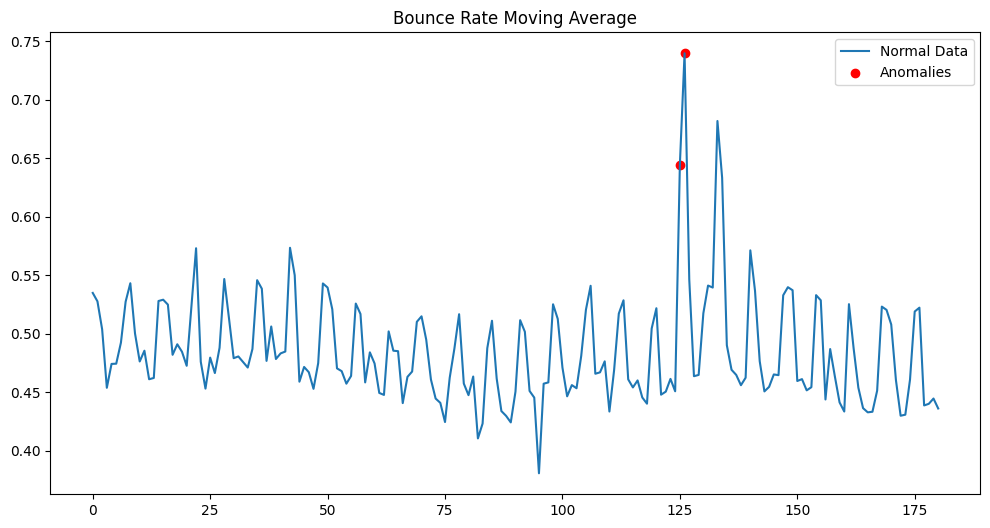

In [46]:
def moving_average(data):
  rolling_mean = data.rolling(window=30).mean()
  rolling_std = data.rolling(window=30).std()
  return data[(data - rolling_mean).abs() > (3 * rolling_std)]

plot(users, moving_average(users), 'Users Moving Average')
plot(sessions, moving_average(sessions), 'Sessions Moving Average')
plot(bounce_rate, moving_average(bounce_rate), 'Bounce Rate Moving Average')

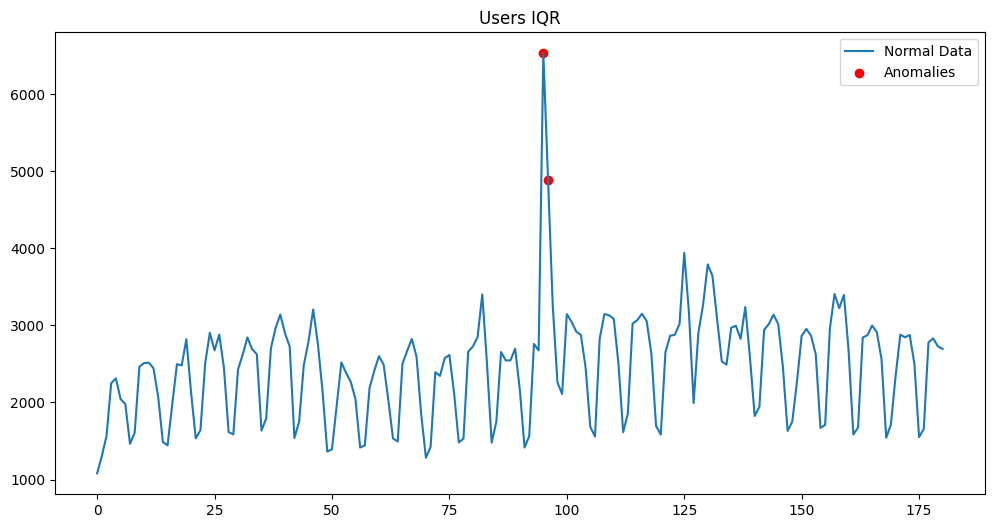

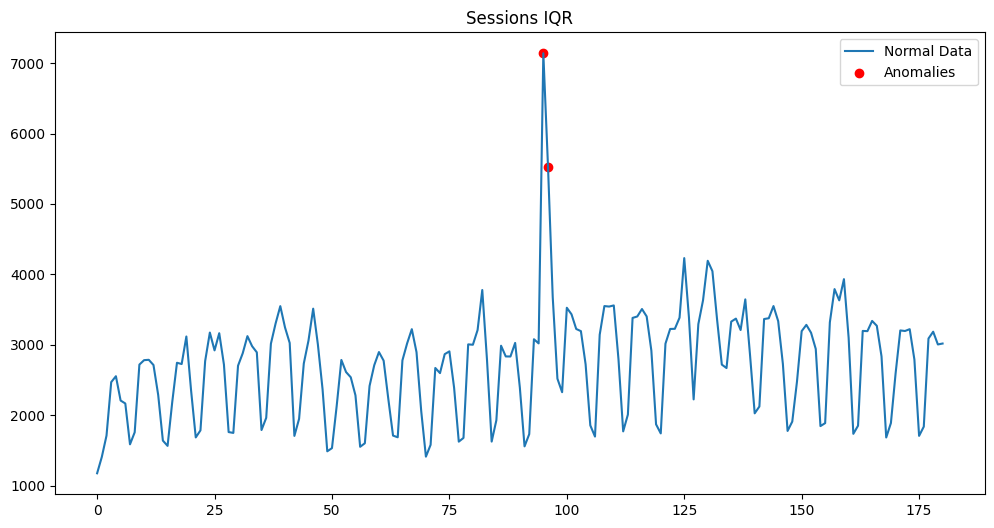

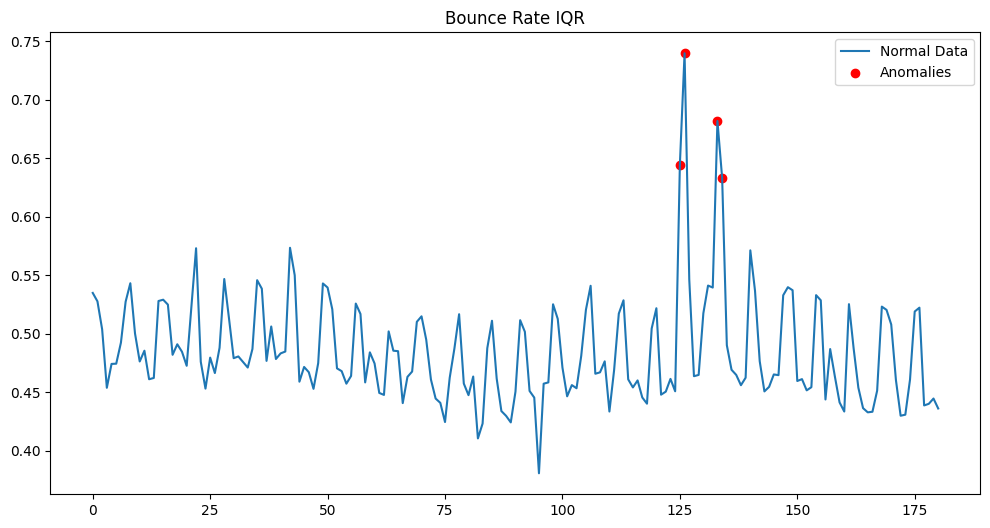

In [47]:
def iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  return data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

plot(users, iqr(users), 'Users IQR')
plot(sessions, iqr(sessions), 'Sessions IQR')
plot(bounce_rate, iqr(bounce_rate), 'Bounce Rate IQR')